In [25]:
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
#sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

In [349]:
refseq = pd.read_csv("../data/assembly_summary_refseq.txt", sep = "\t")

/tmp/ipykernel_30982/1251523544.py:1: DtypeWarning: Columns (34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  refseq = pd.read_csv("../data/assembly_summary_refseq.txt", sep = "\t")


In [357]:
refseq = refseq.sort_values("species_taxid").drop_duplicates("species_taxid").reset_index(drop=True)

In [358]:
refseq["genome_size"].sum()/1000000000

2339.490698212

In [351]:
refseq.columns

Index(['#assembly_accession', 'bioproject', 'biosample', 'wgs_master',
       'refseq_category', 'taxid', 'species_taxid', 'organism_name',
       'infraspecific_name', 'isolate', 'version_status', 'assembly_level',
       'release_type', 'genome_rep', 'seq_rel_date', 'asm_name',
       'asm_submitter', 'gbrs_paired_asm', 'paired_asm_comp', 'ftp_path',
       'excluded_from_refseq', 'relation_to_type_material',
       'asm_not_live_date', 'assembly_type', 'group', 'genome_size',
       'genome_size_ungapped', 'gc_percent', 'replicon_count',
       'scaffold_count', 'contig_count', 'annotation_provider',
       'annotation_name', 'annotation_date', 'total_gene_count',
       'protein_coding_gene_count', 'non_coding_gene_count', 'pubmed_id'],
      dtype='object')

Mapping with minimap2:

In [374]:
%%bash
source ~/.bashrc
for MIX in MixA MixB MixC MixD; do
    for REF in $( ls ../examples/*.fna.gz | cut -d"/" -f3 | rev | cut -d"." -f3- | rev ); do
        minimap2 -ax sr -t 4 -N 500 --sam-hit-only ../examples/${REF}.fna.gz \
            ../examples/${MIX}_1.fq.gz ../examples/${MIX}_2.fq.gz \
            | awk '$3!="*"' | samtools view -bS - > ../examples/${MIX}_${REF}_minimap2.bam
    done
    samtools merge -@ 4 -n ../examples/${MIX}_minimap2.bam ../examples/${MIX}_*_minimap2.bam
    samtools sort -@ 4 -m 2G -n -O bam -o ../examples/${MIX}_minimap2.sorted.bam ../examples/${MIX}_minimap2.bam
    rm ../examples/${MIX}_minimap2.bam
    rm ../examples/${MIX}_GCF*_minimap2.bam
done

[M::mm_idx_gen::0.182*1.00] collected minimizers
[M::mm_idx_gen::0.223*1.28] sorted minimizers
[M::main::0.223*1.28] loaded/built the index for 1 target sequence(s)
[M::mm_mapopt_update::0.223*1.28] mid_occ = 1000
[M::mm_idx_stat] kmer size: 21; skip: 11; is_hpc: 0; #seq: 1
[M::mm_idx_stat::0.230*1.27] distinct minimizers: 757233 (99.27% are singletons); average occurrences: 1.021; average spacing: 6.004; total length: 4641652
[M::worker_pipeline::0.543*1.27] mapped 27324 sequences
[M::main] Version: 2.30-r1287
[M::main] CMD: minimap2 -ax sr -t 4 -N 500 --sam-hit-only ../examples/GCF_000005845.2_ASM584v2_genomic.fna.gz ../examples/MixA_1.fq.gz ../examples/MixA_2.fq.gz
[M::main] Real time: 0.552 sec; CPU: 0.700 sec; Peak RSS: 0.058 GB
[M::mm_idx_gen::0.144*0.98] collected minimizers
[M::mm_idx_gen::0.189*1.41] sorted minimizers
[M::main::0.189*1.41] loaded/built the index for 3 target sequence(s)
[M::mm_mapopt_update::0.189*1.41] mid_occ = 1000
[M::mm_idx_stat] kmer size: 21; skip: 11; 

Building BWA and Bowtie2 indexes:

In [343]:
%%bash
source ~/.bashrc
for REF in $( ls ../examples/*.fna.gz | cut -d"/" -f3 | rev | cut -d"." -f3- | rev ); do
    bowtie2-build --threads 4 ../examples/${REF}.fna.gz ../examples/${REF}.fna.gz
    bwa index ../examples/${REF}.fna.gz
done

Settings:
  Output files: "../examples/GCF_000005845.2_ASM584v2_genomic.fna.gz.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 16
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  ../examples/GCF_000005845.2_ASM584v2_genomic.fna.gz


Building a SMALL index


Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to join reference sequences: 00:00:00
bmax according to bmaxDivN setting: 290103
Using parameters --bmax 217578 --dcv 1024
  Doing ahead-of-time memory usage test
  Passed!  Constructing with these parameters: --bmax 217578 --dcv 1024
Constructing suffix-array element generator
Building DifferenceCoverSample
  Building sPrime
  Building sPrimeOrder
  V-Sorting samples
  V-Sorting samples time: 00:00:00
  Allocating rank array
  Ranking v-sort output
  Ranking v-sort output time: 00:00:00
  Invoking Larsson-Sadakane on ranks
  Invoking Larsson-Sadakane on ranks time: 00:00:00
  Sanity-checking and returning
Building samples
Reserving space for 44 sample suffixes
Generating random suffixes
QSorting 44 sample offsets, eliminating duplicates
QSorting sample offsets, eliminating duplicates time: 00:00:00
Multikey QSort

Renaming ../examples/GCF_000005845.2_ASM584v2_genomic.fna.gz.3.bt2.tmp to ../examples/GCF_000005845.2_ASM584v2_genomic.fna.gz.3.bt2
Renaming ../examples/GCF_000005845.2_ASM584v2_genomic.fna.gz.4.bt2.tmp to ../examples/GCF_000005845.2_ASM584v2_genomic.fna.gz.4.bt2
Renaming ../examples/GCF_000005845.2_ASM584v2_genomic.fna.gz.1.bt2.tmp to ../examples/GCF_000005845.2_ASM584v2_genomic.fna.gz.1.bt2
Renaming ../examples/GCF_000005845.2_ASM584v2_genomic.fna.gz.2.bt2.tmp to ../examples/GCF_000005845.2_ASM584v2_genomic.fna.gz.2.bt2
Renaming ../examples/GCF_000005845.2_ASM584v2_genomic.fna.gz.rev.1.bt2.tmp to ../examples/GCF_000005845.2_ASM584v2_genomic.fna.gz.rev.1.bt2
Renaming ../examples/GCF_000005845.2_ASM584v2_genomic.fna.gz.rev.2.bt2.tmp to ../examples/GCF_000005845.2_ASM584v2_genomic.fna.gz.rev.2.bt2
[bwa_index] Pack FASTA... 0.06 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 1.20 seconds elapse.
[bwa_index] Update BWT... 0.02 sec
[bwa_index] Pack forward-only FASTA.

Settings:
  Output files: "../examples/GCF_000008865.2_ASM886v2_genomic.fna.gz.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 16
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  ../examples/GCF_000008865.2_ASM886v2_genomic.fna.gz


Building a SMALL index


Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to join reference sequences: 00:00:01
bmax according to bmaxDivN setting: 349662
Using parameters --bmax 262247 --dcv 1024
  Doing ahead-of-time memory usage test
  Passed!  Constructing with these parameters: --bmax 262247 --dcv 1024
Constructing suffix-array element generator
Building DifferenceCoverSample
  Building sPrime
  Building sPrimeOrder
  V-Sorting samples
  V-Sorting samples time: 00:00:00
  Allocating rank array
  Ranking v-sort output
  Ranking v-sort output time: 00:00:00
  Invoking Larsson-Sadakane on ranks
  Invoking Larsson-Sadakane on ranks time: 00:00:00
  Sanity-checking and returning
Building samples
Reserving space for 44 sample suffixes
Generating random suffixes
QSorting 44 sample offsets, eliminating duplicates
QSorting sample offsets, eliminating duplicates time: 00:00:00
Multikey QSort

Renaming ../examples/GCF_000008865.2_ASM886v2_genomic.fna.gz.3.bt2.tmp to ../examples/GCF_000008865.2_ASM886v2_genomic.fna.gz.3.bt2
Renaming ../examples/GCF_000008865.2_ASM886v2_genomic.fna.gz.4.bt2.tmp to ../examples/GCF_000008865.2_ASM886v2_genomic.fna.gz.4.bt2
Renaming ../examples/GCF_000008865.2_ASM886v2_genomic.fna.gz.1.bt2.tmp to ../examples/GCF_000008865.2_ASM886v2_genomic.fna.gz.1.bt2
Renaming ../examples/GCF_000008865.2_ASM886v2_genomic.fna.gz.2.bt2.tmp to ../examples/GCF_000008865.2_ASM886v2_genomic.fna.gz.2.bt2
Renaming ../examples/GCF_000008865.2_ASM886v2_genomic.fna.gz.rev.1.bt2.tmp to ../examples/GCF_000008865.2_ASM886v2_genomic.fna.gz.rev.1.bt2
Renaming ../examples/GCF_000008865.2_ASM886v2_genomic.fna.gz.rev.2.bt2.tmp to ../examples/GCF_000008865.2_ASM886v2_genomic.fna.gz.rev.2.bt2
[bwa_index] Pack FASTA... 0.07 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 1.55 seconds elapse.
[bwa_index] Update BWT... 0.04 sec
[bwa_index] Pack forward-only FASTA.

Settings:
  Output files: "../examples/GCF_000026225.1_ASM2622v1_genomic.fna.gz.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 16
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  ../examples/GCF_000026225.1_ASM2622v1_genomic.fna.gz


Building a SMALL index


Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to join reference sequences: 00:00:00
bmax according to bmaxDivN setting: 290241
Using parameters --bmax 217681 --dcv 1024
  Doing ahead-of-time memory usage test
  Passed!  Constructing with these parameters: --bmax 217681 --dcv 1024
Constructing suffix-array element generator
Building DifferenceCoverSample
  Building sPrime
  Building sPrimeOrder
  V-Sorting samples
  V-Sorting samples time: 00:00:00
  Allocating rank array
  Ranking v-sort output
  Ranking v-sort output time: 00:00:00
  Invoking Larsson-Sadakane on ranks
  Invoking Larsson-Sadakane on ranks time: 00:00:00
  Sanity-checking and returning
Building samples
Reserving space for 44 sample suffixes
Generating random suffixes
QSorting 44 sample offsets, eliminating duplicates
QSorting sample offsets, eliminating duplicates time: 00:00:00
Multikey QSort

Renaming ../examples/GCF_000026225.1_ASM2622v1_genomic.fna.gz.3.bt2.tmp to ../examples/GCF_000026225.1_ASM2622v1_genomic.fna.gz.3.bt2
Renaming ../examples/GCF_000026225.1_ASM2622v1_genomic.fna.gz.4.bt2.tmp to ../examples/GCF_000026225.1_ASM2622v1_genomic.fna.gz.4.bt2
Renaming ../examples/GCF_000026225.1_ASM2622v1_genomic.fna.gz.1.bt2.tmp to ../examples/GCF_000026225.1_ASM2622v1_genomic.fna.gz.1.bt2
Renaming ../examples/GCF_000026225.1_ASM2622v1_genomic.fna.gz.2.bt2.tmp to ../examples/GCF_000026225.1_ASM2622v1_genomic.fna.gz.2.bt2
Renaming ../examples/GCF_000026225.1_ASM2622v1_genomic.fna.gz.rev.1.bt2.tmp to ../examples/GCF_000026225.1_ASM2622v1_genomic.fna.gz.rev.1.bt2
Renaming ../examples/GCF_000026225.1_ASM2622v1_genomic.fna.gz.rev.2.bt2.tmp to ../examples/GCF_000026225.1_ASM2622v1_genomic.fna.gz.rev.2.bt2
[bwa_index] Pack FASTA... 0.06 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 1.34 seconds elapse.
[bwa_index] Update BWT... 0.03 sec
[bwa_index] Pack forward

Settings:
  Output files: "../examples/GCF_000699345.1_11227-1_genomic.fna.gz.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 16
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  ../examples/GCF_000699345.1_11227-1_genomic.fna.gz


Building a SMALL index


Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to join reference sequences: 00:00:00
bmax according to bmaxDivN setting: 348773
Using parameters --bmax 261580 --dcv 1024
  Doing ahead-of-time memory usage test
  Passed!  Constructing with these parameters: --bmax 261580 --dcv 1024
Constructing suffix-array element generator
Building DifferenceCoverSample
  Building sPrime
  Building sPrimeOrder
  V-Sorting samples
  V-Sorting samples time: 00:00:00
  Allocating rank array
  Ranking v-sort output
  Ranking v-sort output time: 00:00:00
  Invoking Larsson-Sadakane on ranks
  Invoking Larsson-Sadakane on ranks time: 00:00:00
  Sanity-checking and returning
Building samples
Reserving space for 44 sample suffixes
Generating random suffixes
QSorting 44 sample offsets, eliminating duplicates
QSorting sample offsets, eliminating duplicates time: 00:00:00
Multikey QSort

Renaming ../examples/GCF_000699345.1_11227-1_genomic.fna.gz.3.bt2.tmp to ../examples/GCF_000699345.1_11227-1_genomic.fna.gz.3.bt2
Renaming ../examples/GCF_000699345.1_11227-1_genomic.fna.gz.4.bt2.tmp to ../examples/GCF_000699345.1_11227-1_genomic.fna.gz.4.bt2
Renaming ../examples/GCF_000699345.1_11227-1_genomic.fna.gz.1.bt2.tmp to ../examples/GCF_000699345.1_11227-1_genomic.fna.gz.1.bt2
Renaming ../examples/GCF_000699345.1_11227-1_genomic.fna.gz.2.bt2.tmp to ../examples/GCF_000699345.1_11227-1_genomic.fna.gz.2.bt2
Renaming ../examples/GCF_000699345.1_11227-1_genomic.fna.gz.rev.1.bt2.tmp to ../examples/GCF_000699345.1_11227-1_genomic.fna.gz.rev.1.bt2
Renaming ../examples/GCF_000699345.1_11227-1_genomic.fna.gz.rev.2.bt2.tmp to ../examples/GCF_000699345.1_11227-1_genomic.fna.gz.rev.2.bt2
[bwa_index] Pack FASTA... 0.07 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 1.37 seconds elapse.
[bwa_index] Update BWT... 0.08 sec
[bwa_index] Pack forward-only FASTA... 0.14 sec


Mapping with BWA, Bowtie2 in local mode, and Bowtie2 in global mode:

In [375]:
%%bash
source ~/.bashrc
for MIX in MixA MixB MixC MixD; do
    for REF in $( ls ../examples/*.fna.gz | cut -d"/" -f3 | rev | cut -d"." -f3- | rev ); do
        bwa mem -t 4 -h 500 ../examples/${REF}.fna.gz \
            ../examples/${MIX}_1.fq.gz ../examples/${MIX}_2.fq.gz \
            | awk '$3!="*"' | samtools view -bS - > ../examples/${MIX}_${REF}_bwa.bam
    done
    samtools merge -@ 4 -n ../examples/${MIX}_bwa.bam ../examples/${MIX}_*_bwa.bam
    samtools sort -@ 4 -m 2G -n -O bam -o ../examples/${MIX}_bwa.sorted.bam ../examples/${MIX}_bwa.bam
    rm ../examples/${MIX}_bwa.bam
    rm ../examples/${MIX}_GCF*_bwa.bam
done

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 27324 sequences (4000429 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (10, 8684, 0, 6)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (131, 248, 498)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 1232)
[M::mem_pestat] mean and std.dev: (314.00, 281.52)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 1599)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (292, 395, 496)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 904)
[M::mem_pestat] mean and std.dev: (397.33, 160.07)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 1108)
[M::mem_pestat] skip orientation RF as there are not enough pairs
[M::mem_pestat] skip orientation RR as there are not enough pairs
[M::mem_pestat] skip orientati

In [377]:
%%bash
source ~/.bashrc
for MIX in MixA MixB MixC MixD; do
    for REF in $( ls ../examples/*.fna.gz | cut -d"/" -f3 | rev | cut -d"." -f3- | rev ); do
        bowtie2 --threads 4 -k 500 --end-to-end -x ../examples/${REF}.fna.gz \
            -1 ../examples/${MIX}_1.fq.gz -2 ../examples/${MIX}_2.fq.gz --no-unal \
            | awk '$3!="*"' | samtools view -bS - > ../examples/${MIX}_${REF}_bowtie_global.bam
    done
    samtools merge -@ 4 -n ../examples/${MIX}_bowtie_global.bam ../examples/${MIX}_*_bowtie_global.bam
    samtools sort -@ 4 -m 2G -n -O bam -o ../examples/${MIX}_bowtie_global.sorted.bam ../examples/${MIX}_bowtie_global.bam
    rm ../examples/${MIX}_bowtie_global.bam
    rm ../examples/${MIX}_GCF*_bowtie_global.bam
done

13662 reads; of these:
  13662 (100.00%) were paired; of these:
    7456 (54.57%) aligned concordantly 0 times
    6062 (44.37%) aligned concordantly exactly 1 time
    144 (1.05%) aligned concordantly >1 times
    ----
    7456 pairs aligned concordantly 0 times; of these:
      2009 (26.94%) aligned discordantly 1 time
    ----
    5447 pairs aligned 0 times concordantly or discordantly; of these:
      10894 mates make up the pairs; of these:
        10399 (95.46%) aligned 0 times
        389 (3.57%) aligned exactly 1 time
        106 (0.97%) aligned >1 times
61.94% overall alignment rate
13662 reads; of these:
  13662 (100.00%) were paired; of these:
    6865 (50.25%) aligned concordantly 0 times
    6470 (47.36%) aligned concordantly exactly 1 time
    327 (2.39%) aligned concordantly >1 times
    ----
    6865 pairs aligned concordantly 0 times; of these:
      1887 (27.49%) aligned discordantly 1 time
    ----
    4978 pairs aligned 0 times concordantly or discordantly; of these

In [378]:
%%bash
source ~/.bashrc
for MIX in MixA MixB MixC MixD; do
    for REF in $( ls ../examples/*.fna.gz | cut -d"/" -f3 | rev | cut -d"." -f3- | rev ); do
        bowtie2 --threads 4 -k 500 --local -x ../examples/${REF}.fna.gz \
            -1 ../examples/${MIX}_1.fq.gz -2 ../examples/${MIX}_2.fq.gz --no-unal \
            | awk '$3!="*"' | samtools view -bS - > ../examples/${MIX}_${REF}_bowtie_local.bam
    done
    samtools merge -@ 4 -n ../examples/${MIX}_bowtie_local.bam ../examples/${MIX}_*_bowtie_local.bam
    samtools sort -@ 4 -m 2G -n -O bam -o ../examples/${MIX}_bowtie_local.sorted.bam ../examples/${MIX}_bowtie_local.bam
    rm ../examples/${MIX}_bowtie_local.bam
    rm ../examples/${MIX}_GCF*_bowtie_local.bam
done

13662 reads; of these:
  13662 (100.00%) were paired; of these:
    7013 (51.33%) aligned concordantly 0 times
    6405 (46.88%) aligned concordantly exactly 1 time
    244 (1.79%) aligned concordantly >1 times
    ----
    7013 pairs aligned concordantly 0 times; of these:
      2027 (28.90%) aligned discordantly 1 time
    ----
    4986 pairs aligned 0 times concordantly or discordantly; of these:
      9972 mates make up the pairs; of these:
        9546 (95.73%) aligned 0 times
        261 (2.62%) aligned exactly 1 time
        165 (1.65%) aligned >1 times
65.06% overall alignment rate
13662 reads; of these:
  13662 (100.00%) were paired; of these:
    6427 (47.04%) aligned concordantly 0 times
    6757 (49.46%) aligned concordantly exactly 1 time
    478 (3.50%) aligned concordantly >1 times
    ----
    6427 pairs aligned concordantly 0 times; of these:
      1944 (30.25%) aligned discordantly 1 time
    ----
    4483 pairs aligned 0 times concordantly or discordantly; of these:


In [128]:
%%bash
echo -e "accession\taccession.version\ttaxid\tgi" > ../examples/acc2taxid
paste <( zcat ../examples/GCF_000005845.2_ASM584v2_genomic.fna.gz | grep "^>" | cut -d" " -f1 | sed "s/>//g" ) \
    <( zcat ../examples/GCF_000005845.2_ASM584v2_genomic.fna.gz | grep "^>" | cut -d" " -f1 | sed "s/>//g" | sed 's/$/\t511145/g') \
    <( zcat ../examples/GCF_000005845.2_ASM584v2_genomic.fna.gz | grep "^>" | cut -d" " -f1 | sed "s/>//g" ) >> ../examples/acc2taxid
paste <( zcat ../examples/GCF_000008865.2_ASM886v2_genomic.fna.gz | grep "^>" | cut -d" " -f1 | sed "s/>//g" ) \
    <( zcat ../examples/GCF_000008865.2_ASM886v2_genomic.fna.gz | grep "^>" | cut -d" " -f1 | sed "s/>//g" | sed 's/$/\t386585/g') \
    <( zcat ../examples/GCF_000008865.2_ASM886v2_genomic.fna.gz | grep "^>" | cut -d" " -f1 | sed "s/>//g" ) >> ../examples/acc2taxid
paste <( zcat ../examples/GCF_000026225.1_ASM2622v1_genomic.fna.gz | grep "^>" | cut -d" " -f1 | sed "s/>//g" ) \
    <( zcat ../examples/GCF_000026225.1_ASM2622v1_genomic.fna.gz | grep "^>" | cut -d" " -f1 | sed "s/>//g" | sed 's/$/\t585054/g') \
    <( zcat ../examples/GCF_000026225.1_ASM2622v1_genomic.fna.gz | grep "^>" | cut -d" " -f1 | sed "s/>//g" ) >> ../examples/acc2taxid
paste <( zcat ../examples/GCF_000699345.1_11227-1_genomic.fna.gz | grep "^>" | cut -d" " -f1 | sed "s/>//g" ) \
    <( zcat ../examples/GCF_000699345.1_11227-1_genomic.fna.gz | grep "^>" | cut -d" " -f1 | sed "s/>//g" | sed 's/$/\t1455604/g') \
    <( zcat ../examples/GCF_000699345.1_11227-1_genomic.fna.gz | grep "^>" | cut -d" " -f1 | sed "s/>//g" ) >> ../examples/acc2taxid
gzip ../examples/acc2taxid

In [6]:
%%bash
cd ../examples
wget -q https://ftp.ncbi.nih.gov/pub/taxonomy/new_taxdump/new_taxdump.tar.gz 
tar -xzvf ./new_taxdump.tar.gz
gzip ./names.dmp
gzip ./nodes.dmp
rm ./*.dmp
rm ./new_taxdump.tar.gz 

citations.dmp
delnodes.dmp
division.dmp
excludedfromtype.dmp
fullnamelineage.dmp
gencode.dmp
host.dmp
images.dmp
merged.dmp
names.dmp
nodes.dmp
rankedlineage.dmp
taxidlineage.dmp
typematerial.dmp
typeoftype.dmp


In [108]:
%%bash
source ~/.bashrc
source activate base
conda activate cladeaid
for SAMP in ../examples/MixA_bowtie_global; do
    python ../cladeaid/cladeaid.py \
        --bam ${SAMP}.sorted.bam \
        --output ${SAMP} \
        --nodes ../examples/nodes.dmp.gz \
        --names ../examples/names.dmp.gz \
        --acc2taxid ../examples/acc2taxid.gz \
        --estimate_abundance --mash_reallocation \
        --reference_genome_list ../examples/references.list \
        --normalize \
        --threads 4
done    

[E::idx_find_and_load] Could not retrieve index file for '../examples/MixA_bowtie_global.sorted.bam'
[E::idx_find_and_load] Could not retrieve index file for '../examples/MixA_bowtie_global.sorted.bam'
[E::idx_find_and_load] Could not retrieve index file for '../examples/MixA_bowtie_global.sorted.bam'
../cladeaid/cladeaid.py:229: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  propagated_counts[prop + "_Proportion"][i] = propagated_counts[prop + "_Bases"][i] / reference_sizes[propagated_counts["TaxID"][i]]


üîÑ Loading taxonomy data...
üîé Scanning BAM for reference names...
‚úÖ Found 96 reference names in BAM
‚úÖ Mapped 96 reference IDs to taxids
üìñ Opening BAM file: ../examples/MixA_bowtie_global.sorted.bam
‚úÖ Done: 12,766 read pairs assigned in           18.6s
üî¢ Read groups with R1 + R2:             12,472
üî¢ Read groups missing one end:           294
üß¨ Paired reads with same taxid:                 9,136
üß¨ Paired reads where one read is more specific:                 2,749
üß¨ Paired reads with discordant taxid:           587
Mash distance matrix already exists. Skipping computation.
                                                    ../examples/GCF_000005845.2_ASM584v2_genomic.fna.gz  ...  ../examples/GCF_000699345.1_11227-1_genomic.fna.gz
../examples/GCF_000005845.2_ASM584v2_genomic.fn...                                           0.000000    ...                                           0.203604 
../examples/GCF_000008865.2_ASM886v2_genomic.fn...                    

In [136]:
%%bash
source ~/.bashrc
source activate base
conda activate cladeaid
for SAMP in ../data/MixA_targetref_only ../data/MixB_targetref_only ../data/MixC_targetref_only ../data/MixD_targetref_only \
    ../data/MixA ../data/MixB ../data/MixC ../data/MixD ../data/MixE ../data/MixF ../data/MixG ../data/MixH ; do 
    python ../cladeaid/cladeaid.py \
        --bam ${SAMP}.merged.sorted.bam \
        --output ${SAMP}_euk \
        --nodes ../examples/nodes.dmp.gz \
        --names ../examples/names.dmp.gz \
        --acc2taxid ../data/acc2tid.gz \
        --estimate_abundance \
        --threads 4 --pairwise_dists ${SAMP}_euk.dists \
        --reference_genome_list ../data/references.list \
        --mash_reallocation
done

[E::idx_find_and_load] Could not retrieve index file for '../data/MixA_targetref_only.merged.sorted.bam'
[E::idx_find_and_load] Could not retrieve index file for '../data/MixA_targetref_only.merged.sorted.bam'
[E::idx_find_and_load] Could not retrieve index file for '../data/MixA_targetref_only.merged.sorted.bam'


üîÑ Loading taxonomy data...
üîé Scanning BAM for reference names...
‚úÖ Found 11,345 reference names in BAM
‚úÖ Mapped 11345 reference IDs to taxids
üìñ Opening BAM file: ../data/MixA_targetref_only.merged.sorted.bam
‚è≥ Processed 276,208 mappings ‚Üí 42,188                   reads assigned
‚è≥ Processed 532,626 mappings ‚Üí 80,939                   reads assigned
‚è≥ Processed 796,120 mappings ‚Üí 120,978                   reads assigned
‚è≥ Processed 1,045,184 mappings ‚Üí 162,969                   reads assigned
‚è≥ Processed 1,300,121 mappings ‚Üí 206,535                   reads assigned
‚è≥ Processed 1,545,477 mappings ‚Üí 246,925                   reads assigned
‚è≥ Processed 1,804,406 mappings ‚Üí 291,797                   reads assigned
‚è≥ Processed 2,027,103 mappings ‚Üí 351,974                   reads assigned
‚è≥ Processed 2,276,045 mappings ‚Üí 419,503                   reads assigned
‚è≥ Processed 2,539,663 mappings ‚Üí 462,914                   reads assigned
‚è≥ Pro

[E::idx_find_and_load] Could not retrieve index file for '../data/MixB_targetref_only.merged.sorted.bam'
[E::idx_find_and_load] Could not retrieve index file for '../data/MixB_targetref_only.merged.sorted.bam'
[E::idx_find_and_load] Could not retrieve index file for '../data/MixB_targetref_only.merged.sorted.bam'


üîÑ Loading taxonomy data...
üîé Scanning BAM for reference names...
‚úÖ Found 11,345 reference names in BAM
‚úÖ Mapped 11345 reference IDs to taxids
üìñ Opening BAM file: ../data/MixB_targetref_only.merged.sorted.bam
‚è≥ Processed 280,092 mappings ‚Üí 42,783                   reads assigned
‚è≥ Processed 550,636 mappings ‚Üí 83,740                   reads assigned
‚è≥ Processed 810,522 mappings ‚Üí 129,910                   reads assigned
‚è≥ Processed 1,064,154 mappings ‚Üí 185,614                   reads assigned
‚è≥ Processed 1,288,802 mappings ‚Üí 253,116                   reads assigned
‚è≥ Processed 1,552,446 mappings ‚Üí 305,399                   reads assigned
‚è≥ Processed 1,782,043 mappings ‚Üí 340,908                   reads assigned
‚è≥ Processed 2,010,561 mappings ‚Üí 376,101                   reads assigned
‚è≥ Processed 2,237,910 mappings ‚Üí 411,198                   reads assigned
‚è≥ Processed 2,454,238 mappings ‚Üí 444,906                   reads assigned
‚è≥ Pro

[E::idx_find_and_load] Could not retrieve index file for '../data/MixC_targetref_only.merged.sorted.bam'
[E::idx_find_and_load] Could not retrieve index file for '../data/MixC_targetref_only.merged.sorted.bam'
[E::idx_find_and_load] Could not retrieve index file for '../data/MixC_targetref_only.merged.sorted.bam'


üîÑ Loading taxonomy data...
üîé Scanning BAM for reference names...
‚úÖ Found 11,345 reference names in BAM
‚úÖ Mapped 11345 reference IDs to taxids
üìñ Opening BAM file: ../data/MixC_targetref_only.merged.sorted.bam
‚è≥ Processed 272,060 mappings ‚Üí 41,555                   reads assigned
‚è≥ Processed 530,505 mappings ‚Üí 80,610                   reads assigned
‚è≥ Processed 789,795 mappings ‚Üí 120,042                   reads assigned
‚è≥ Processed 1,046,748 mappings ‚Üí 163,242                   reads assigned
‚è≥ Processed 1,299,006 mappings ‚Üí 206,396                   reads assigned
‚è≥ Processed 1,550,449 mappings ‚Üí 253,130                   reads assigned
‚è≥ Processed 1,810,240 mappings ‚Üí 293,611                   reads assigned
‚è≥ Processed 2,028,563 mappings ‚Üí 326,867                   reads assigned
‚è≥ Processed 2,244,064 mappings ‚Üí 357,360                   reads assigned
‚è≥ Processed 2,426,165 mappings ‚Üí 384,942                   reads assigned
‚è≥ Pro

[E::idx_find_and_load] Could not retrieve index file for '../data/MixD_targetref_only.merged.sorted.bam'
[E::idx_find_and_load] Could not retrieve index file for '../data/MixD_targetref_only.merged.sorted.bam'
[E::idx_find_and_load] Could not retrieve index file for '../data/MixD_targetref_only.merged.sorted.bam'


üîÑ Loading taxonomy data...
üîé Scanning BAM for reference names...
‚úÖ Found 11,345 reference names in BAM
‚úÖ Mapped 11345 reference IDs to taxids
üìñ Opening BAM file: ../data/MixD_targetref_only.merged.sorted.bam
‚è≥ Processed 276,980 mappings ‚Üí 42,385                   reads assigned
‚è≥ Processed 545,141 mappings ‚Üí 91,765                   reads assigned
‚è≥ Processed 795,628 mappings ‚Üí 131,271                   reads assigned
‚è≥ Processed 1,057,452 mappings ‚Üí 171,486                   reads assigned
‚è≥ Processed 1,322,704 mappings ‚Üí 214,290                   reads assigned
‚úÖ Done: 239,876 read pairs assigned in           29.8s
üî¢ Read groups with R1 + R2:             236,106
üî¢ Read groups missing one end:           3,770
üß¨ Paired reads with same taxid:                 181,163
üß¨ Paired reads where one read is more specific:                 33,362
üß¨ Paired reads with discordant taxid:           21,581
Mash distance matrix already exists. Skipping co

[E::idx_find_and_load] Could not retrieve index file for '../data/MixA.merged.sorted.bam'
[E::idx_find_and_load] Could not retrieve index file for '../data/MixA.merged.sorted.bam'
[E::idx_find_and_load] Could not retrieve index file for '../data/MixA.merged.sorted.bam'


üîÑ Loading taxonomy data...
üîé Scanning BAM for reference names...
‚úÖ Found 1,075,889 reference names in BAM
‚úÖ Mapped 1075889 reference IDs to taxids
üìñ Opening BAM file: ../data/MixA.merged.sorted.bam
‚è≥ Processed 321,195 mappings ‚Üí 24,810                   reads assigned
‚è≥ Processed 649,213 mappings ‚Üí 46,191                   reads assigned
‚è≥ Processed 981,833 mappings ‚Üí 65,876                   reads assigned
‚è≥ Processed 1,324,338 mappings ‚Üí 86,333                   reads assigned
‚è≥ Processed 1,657,605 mappings ‚Üí 106,522                   reads assigned
‚è≥ Processed 1,995,736 mappings ‚Üí 126,811                   reads assigned
‚è≥ Processed 2,292,537 mappings ‚Üí 152,715                   reads assigned
‚è≥ Processed 2,605,135 mappings ‚Üí 185,437                   reads assigned
‚è≥ Processed 2,922,049 mappings ‚Üí 207,476                   reads assigned
‚è≥ Processed 3,239,995 mappings ‚Üí 229,421                   reads assigned
‚è≥ Processed 3,574

[E::idx_find_and_load] Could not retrieve index file for '../data/MixB.merged.sorted.bam'
[E::idx_find_and_load] Could not retrieve index file for '../data/MixB.merged.sorted.bam'
[E::idx_find_and_load] Could not retrieve index file for '../data/MixB.merged.sorted.bam'


üîÑ Loading taxonomy data...
üîé Scanning BAM for reference names...
‚úÖ Found 1,075,889 reference names in BAM
‚úÖ Mapped 1075889 reference IDs to taxids
üìñ Opening BAM file: ../data/MixB.merged.sorted.bam
‚è≥ Processed 310,982 mappings ‚Üí 23,964                   reads assigned
‚è≥ Processed 649,117 mappings ‚Üí 46,218                   reads assigned
‚è≥ Processed 977,242 mappings ‚Üí 65,710                   reads assigned
‚è≥ Processed 1,322,806 mappings ‚Üí 88,314                   reads assigned
‚è≥ Processed 1,622,817 mappings ‚Üí 120,105                   reads assigned
‚è≥ Processed 1,927,154 mappings ‚Üí 147,101                   reads assigned
‚è≥ Processed 2,198,381 mappings ‚Üí 172,346                   reads assigned
‚è≥ Processed 2,435,185 mappings ‚Üí 201,559                   reads assigned
‚è≥ Processed 2,646,494 mappings ‚Üí 230,422                   reads assigned
‚è≥ Processed 2,906,494 mappings ‚Üí 258,960                   reads assigned
‚è≥ Processed 3,192

[E::idx_find_and_load] Could not retrieve index file for '../data/MixC.merged.sorted.bam'
[E::idx_find_and_load] Could not retrieve index file for '../data/MixC.merged.sorted.bam'
[E::idx_find_and_load] Could not retrieve index file for '../data/MixC.merged.sorted.bam'


üîÑ Loading taxonomy data...
üîé Scanning BAM for reference names...
‚úÖ Found 1,075,889 reference names in BAM
‚úÖ Mapped 1075889 reference IDs to taxids
üìñ Opening BAM file: ../data/MixC.merged.sorted.bam
‚è≥ Processed 319,116 mappings ‚Üí 24,629                   reads assigned
‚è≥ Processed 665,284 mappings ‚Üí 47,119                   reads assigned
‚è≥ Processed 1,008,237 mappings ‚Üí 67,426                   reads assigned
‚è≥ Processed 1,344,677 mappings ‚Üí 87,567                   reads assigned
‚è≥ Processed 1,682,189 mappings ‚Üí 108,038                   reads assigned
‚è≥ Processed 2,029,587 mappings ‚Üí 128,957                   reads assigned
‚è≥ Processed 2,344,989 mappings ‚Üí 158,290                   reads assigned
‚è≥ Processed 2,662,774 mappings ‚Üí 189,448                   reads assigned
‚è≥ Processed 2,989,305 mappings ‚Üí 212,218                   reads assigned
‚è≥ Processed 3,304,384 mappings ‚Üí 234,890                   reads assigned
‚è≥ Processed 3,5

[E::idx_find_and_load] Could not retrieve index file for '../data/MixD.merged.sorted.bam'
[E::idx_find_and_load] Could not retrieve index file for '../data/MixD.merged.sorted.bam'
[E::idx_find_and_load] Could not retrieve index file for '../data/MixD.merged.sorted.bam'


üîÑ Loading taxonomy data...
üîé Scanning BAM for reference names...
‚úÖ Found 1,075,889 reference names in BAM
‚úÖ Mapped 1075889 reference IDs to taxids
üìñ Opening BAM file: ../data/MixD.merged.sorted.bam
‚è≥ Processed 310,349 mappings ‚Üí 23,911                   reads assigned
‚è≥ Processed 623,484 mappings ‚Üí 45,015                   reads assigned
‚è≥ Processed 953,816 mappings ‚Üí 64,955                   reads assigned
‚è≥ Processed 1,229,616 mappings ‚Üí 89,695                   reads assigned
‚è≥ Processed 1,514,512 mappings ‚Üí 112,355                   reads assigned
‚è≥ Processed 1,817,710 mappings ‚Üí 133,214                   reads assigned
‚è≥ Processed 2,149,833 mappings ‚Üí 152,801                   reads assigned
‚è≥ Processed 2,490,824 mappings ‚Üí 173,080                   reads assigned
‚è≥ Processed 2,826,373 mappings ‚Üí 194,293                   reads assigned
‚è≥ Processed 3,126,001 mappings ‚Üí 215,245                   reads assigned
‚è≥ Processed 3,407

[E::idx_find_and_load] Could not retrieve index file for '../data/MixE.merged.sorted.bam'
[E::idx_find_and_load] Could not retrieve index file for '../data/MixE.merged.sorted.bam'
[E::idx_find_and_load] Could not retrieve index file for '../data/MixE.merged.sorted.bam'


üîÑ Loading taxonomy data...
üîé Scanning BAM for reference names...
‚úÖ Found 1,075,889 reference names in BAM
‚úÖ Mapped 1075889 reference IDs to taxids
üìñ Opening BAM file: ../data/MixE.merged.sorted.bam
‚è≥ Processed 294,502 mappings ‚Üí 36,758                   reads assigned
‚è≥ Processed 601,937 mappings ‚Üí 70,211                   reads assigned
‚è≥ Processed 922,410 mappings ‚Üí 93,881                   reads assigned
‚è≥ Processed 1,230,919 mappings ‚Üí 123,157                   reads assigned
‚è≥ Processed 1,506,408 mappings ‚Üí 165,016                   reads assigned
‚è≥ Processed 1,800,966 mappings ‚Üí 212,529                   reads assigned
‚è≥ Processed 2,095,015 mappings ‚Üí 242,084                   reads assigned
‚è≥ Processed 2,356,724 mappings ‚Üí 264,246                   reads assigned
‚è≥ Processed 2,674,005 mappings ‚Üí 288,106                   reads assigned
‚è≥ Processed 3,007,574 mappings ‚Üí 307,751                   reads assigned
‚è≥ Processed 3,32

[E::idx_find_and_load] Could not retrieve index file for '../data/MixF.merged.sorted.bam'
[E::idx_find_and_load] Could not retrieve index file for '../data/MixF.merged.sorted.bam'
[E::idx_find_and_load] Could not retrieve index file for '../data/MixF.merged.sorted.bam'


üîÑ Loading taxonomy data...
üîé Scanning BAM for reference names...
‚úÖ Found 1,075,889 reference names in BAM
‚úÖ Mapped 1075889 reference IDs to taxids
üìñ Opening BAM file: ../data/MixF.merged.sorted.bam
‚è≥ Processed 300,989 mappings ‚Üí 37,417                   reads assigned
‚è≥ Processed 606,709 mappings ‚Üí 70,753                   reads assigned
‚è≥ Processed 930,144 mappings ‚Üí 94,412                   reads assigned
‚è≥ Processed 1,245,622 mappings ‚Üí 125,398                   reads assigned
‚è≥ Processed 1,542,144 mappings ‚Üí 170,385                   reads assigned
‚è≥ Processed 1,831,626 mappings ‚Üí 216,876                   reads assigned
‚è≥ Processed 2,150,111 mappings ‚Üí 247,298                   reads assigned
‚è≥ Processed 2,493,220 mappings ‚Üí 274,786                   reads assigned
‚è≥ Processed 2,835,075 mappings ‚Üí 297,609                   reads assigned
‚è≥ Processed 3,165,153 mappings ‚Üí 317,076                   reads assigned
‚è≥ Processed 3,50

[E::idx_find_and_load] Could not retrieve index file for '../data/MixG.merged.sorted.bam'
[E::idx_find_and_load] Could not retrieve index file for '../data/MixG.merged.sorted.bam'
[E::idx_find_and_load] Could not retrieve index file for '../data/MixG.merged.sorted.bam'


üîÑ Loading taxonomy data...
üîé Scanning BAM for reference names...
‚úÖ Found 1,075,889 reference names in BAM
‚úÖ Mapped 1075889 reference IDs to taxids
üìñ Opening BAM file: ../data/MixG.merged.sorted.bam
‚è≥ Processed 309,095 mappings ‚Üí 30,041                   reads assigned
‚è≥ Processed 632,443 mappings ‚Üí 52,847                   reads assigned
‚è≥ Processed 933,677 mappings ‚Üí 92,307                   reads assigned
‚è≥ Processed 1,219,093 mappings ‚Üí 135,223                   reads assigned
‚è≥ Processed 1,506,445 mappings ‚Üí 179,338                   reads assigned
‚è≥ Processed 1,795,349 mappings ‚Üí 223,918                   reads assigned
‚è≥ Processed 2,093,001 mappings ‚Üí 269,347                   reads assigned
‚è≥ Processed 2,381,264 mappings ‚Üí 312,690                   reads assigned
‚è≥ Processed 2,670,925 mappings ‚Üí 355,333                   reads assigned
‚è≥ Processed 2,966,288 mappings ‚Üí 399,357                   reads assigned
‚è≥ Processed 3,26

[E::idx_find_and_load] Could not retrieve index file for '../data/MixH.merged.sorted.bam'
[E::idx_find_and_load] Could not retrieve index file for '../data/MixH.merged.sorted.bam'
[E::idx_find_and_load] Could not retrieve index file for '../data/MixH.merged.sorted.bam'


üîÑ Loading taxonomy data...
üîé Scanning BAM for reference names...
‚úÖ Found 1,075,889 reference names in BAM
‚úÖ Mapped 1075889 reference IDs to taxids
üìñ Opening BAM file: ../data/MixH.merged.sorted.bam
‚è≥ Processed 289,279 mappings ‚Üí 28,710                   reads assigned
‚è≥ Processed 567,016 mappings ‚Üí 48,360                   reads assigned
‚è≥ Processed 862,184 mappings ‚Üí 81,877                   reads assigned
‚è≥ Processed 1,157,781 mappings ‚Üí 125,960                   reads assigned
‚è≥ Processed 1,439,231 mappings ‚Üí 168,835                   reads assigned
‚è≥ Processed 1,731,868 mappings ‚Üí 214,154                   reads assigned
‚è≥ Processed 2,019,753 mappings ‚Üí 257,948                   reads assigned
‚è≥ Processed 2,313,810 mappings ‚Üí 302,970                   reads assigned
‚è≥ Processed 2,594,245 mappings ‚Üí 343,990                   reads assigned
‚è≥ Processed 2,885,086 mappings ‚Üí 387,235                   reads assigned
‚è≥ Processed 3,16

Using ngsLCA as a comparison:

In [255]:
%%bash
source ~/.bashrc
source activate base
conda activate ngsLCA
for SAMP in ../data/MixA_targetref_only ../data/MixB_targetref_only ../data/MixC_targetref_only ../data/MixD_targetref_only \
    ../data/MixA ../data/MixB ../data/MixC ../data/MixD ../data/MixE ../data/MixF ../data/MixG ../data/MixH ; do 
    ~/ngsLCA/ngsLCA \
        -names ../examples/names.dmp.gz \
        -nodes ../examples/nodes.dmp.gz \
        -acc2tax ../data/acc2tid.gz \
        -bam ${SAMP}.merged.sorted.bam \
        -outnames ${SAMP}_euk
done

	-> ngslca version: 0ac5f58-dirty (htslib: 1.22-6-g33ddaaf0) build(Jun 17 2025 10:20:46)
	-> Will output lca results in file:		'../data/MixA_targetref_only_euk.lca'
	-> [thread1] Will read header
	-> Will output lca weight in file:		'../data/MixA_targetref_only_euk.wlca'
	-> Will output log info (problems) in file:	'../data/MixA_targetref_only_euk.log'
	-> [thread1] Done reading header: 0.00 sec, header contains: 11345 
	-> -bam  	../data/MixA_targetref_only.merged.sorted.bam
	-> -names	../examples/names.dmp.gz
	-> -nodes	../examples/nodes.dmp.gz
	-> -acc2tax	../data/acc2tid.gz
	-> -simscoreLow	0.000000
	-> -simscoreHigh	1.000000
	-> -editdistMin	0
	-> -editdistMax	10
	-> -outnames	../data/MixA_targetref_only_euk
	-> -minmapq	0
	-> -fix_ncbi	1
	-> Starting to extract (acc->taxid) from binary file: '../data/acc2tid.gz'
	-> Checking if exits: 'acc2tid.gzMixA_targetref_only.merged.sorted.bam.bin'
check if exists: 0 
	-> opening file: 'acc2tid.gzMixA_targetref_only.merged.sorted.bam.bin' m

In [306]:
%%bash
source ~/.bashrc
source activate base
conda activate ngsLCA
for SAMP in ../data/MixA_targetref_only ../data/MixB_targetref_only ../data/MixC_targetref_only ../data/MixD_targetref_only \
    ../data/MixA ../data/MixB ../data/MixC ../data/MixD ../data/MixE ../data/MixF ../data/MixG ../data/MixH ; do 
    ~/ngsLCA/ngsLCA -simscorelow 0.95 -simscorehigh 1.0 \
        -names ../examples/names.dmp.gz \
        -nodes ../examples/nodes.dmp.gz \
        -acc2tax ../data/acc2tid.gz \
        -bam ${SAMP}.merged.sorted.bam \
        -outnames ${SAMP}_euk_0.95
done

	-> ngslca version: 0ac5f58-dirty (htslib: 1.22-6-g33ddaaf0) build(Jun 17 2025 10:20:46)
	-> Will output lca results in file:		'../data/MixA_targetref_only_euk_0.95.lca'
	-> [thread1] Will read header
	-> Will output lca weight in file:		'../data/MixA_targetref_only_euk_0.95.wlca'
	-> Will output log info (problems) in file:	'../data/MixA_targetref_only_euk_0.95.log'
	-> [thread1] Done reading header: 0.00 sec, header contains: 11345 
	-> -bam  	../data/MixA_targetref_only.merged.sorted.bam
	-> -names	../examples/names.dmp.gz
	-> -nodes	../examples/nodes.dmp.gz
	-> -acc2tax	../data/acc2tid.gz
	-> -simscoreLow	0.950000
	-> -simscoreHigh	1.000000
	-> -editdistMin	0
	-> -editdistMax	10
	-> -outnames	../data/MixA_targetref_only_euk_0.95
	-> -minmapq	0
	-> -fix_ncbi	1
	-> Starting to extract (acc->taxid) from binary file: '../data/acc2tid.gz'
	-> Checking if exits: 'acc2tid.gzMixA_targetref_only.merged.sorted.bam.bin'
check if exists: 0 
	-> opening file: 'acc2tid.gzMixA_targetref_only.merg

In [ ]:
%%bash
for SAMP in ../data/MixA_targetref_only ../data/MixB_targetref_only ../data/MixC_targetref_only ../data/MixD_targetref_only \
    ../data/MixA ../data/MixB ../data/MixC ../data/MixD ../data/MixE ../data/MixF ../data/MixG ../data/MixH ; do 
    paste <( cut -d":" -f1 ${SAMP}_euk.lca | tail -n+3 ) \
        <( cut -f2 ${SAMP}_euk.lca | tail -n+3 ) \
        > ${SAMP}_euk.lca.tsv
done

In [307]:
%%bash
for SAMP in ../data/MixA_targetref_only ../data/MixB_targetref_only ../data/MixC_targetref_only ../data/MixD_targetref_only \
    ../data/MixA ../data/MixB ../data/MixC ../data/MixD ../data/MixE ../data/MixF ../data/MixG ../data/MixH ; do 
    paste <( cut -d":" -f1 ${SAMP}_euk_0.95.lca | tail -n+3 ) \
        <( cut -f2 ${SAMP}_euk_0.95.lca | tail -n+3 ) \
        > ${SAMP}_euk_0.95.lca.tsv
done

In [ ]:
mixes = pd.read_csv("../data/mixes_for_ngsLCA_tests.csv")
mixes["TaxName"] = mixes["Constituent"].str.replace("_", " ")
mixes["True Proportion"] = mixes["Proportion"]

In [366]:
performance_eval_lca = pd.DataFrame()
for abundances in glob.glob("../data/*euk.lca.tsv"):
    mix = abundances.split("/")[2].split("_")[0]
    comparison = abundances.replace(".lca.tsv", "")
    type = abundances.split("/")[2]
    tmp = pd.read_csv(abundances, sep = "\t", header = None, names = ["ReadName", 1])
    tmp["TaxID"] = tmp[1].str.split(":", expand = True)[0]
    tmp["TaxName"] = tmp[1].str.split(":", expand = True)[1]
    tmp["Rank"] = tmp[1].str.split(":", expand = True)[2]
    tmp = tmp.merge(pd.read_csv(comparison + ".csv")[["ReadName", "TotalBases"]], how = "left", on = "ReadName")
    tmp['Assigned_Bases'] = (tmp.groupby(['TaxID', 'TaxName'])['TotalBases'].transform('sum'))
    tmp = (tmp.drop_duplicates(subset=['TaxID', 'TaxName']).reset_index(drop=True))
    tmp = tmp[tmp["Rank"] == "species"]
    tmp["Proportion"] = tmp["Assigned_Bases"] / tmp["Assigned_Bases"].sum()
    tmp1 = mixes.copy()
    tmp1["True Proportion"] = tmp1.groupby(["Mix", "TaxName"])["True Proportion"].transform('sum')
    tmp1 = tmp1.drop_duplicates(subset= ['Mix', 'TaxName'], keep = "first").reset_index(drop=True)
    tmp["Mix"] = mix
    tmp["Type"] = type
    tmp = tmp.merge(tmp1[["Mix", "TaxName", "True Proportion"]], how = "left", on = ["Mix", "TaxName"])
    performance_eval_lca = pd.concat([performance_eval_lca, tmp]).reset_index(drop=True)

In [367]:
performance_eval_lca_95 = pd.DataFrame()
for abundances in glob.glob("../data/*euk_0.95.lca.tsv"):
    mix = abundances.split("/")[2].split("_")[0]
    comparison = abundances.replace("_0.95.lca.tsv", "")
    type = abundances.split("/")[2]
    tmp = pd.read_csv(abundances, sep = "\t", header = None, names = ["ReadName", 1])
    tmp["TaxID"] = tmp[1].str.split(":", expand = True)[0]
    tmp["TaxName"] = tmp[1].str.split(":", expand = True)[1]
    tmp["Rank"] = tmp[1].str.split(":", expand = True)[2]
    tmp = tmp.merge(pd.read_csv(comparison + ".csv")[["ReadName", "TotalBases"]], how = "left", on = "ReadName")
    tmp['Assigned_Bases'] = (tmp.groupby(['TaxID', 'TaxName'])['TotalBases'].transform('sum'))
    tmp = (tmp.drop_duplicates(subset=['TaxID', 'TaxName']).reset_index(drop=True))
    tmp = tmp[tmp["Rank"] == "species"]
    tmp["Proportion"] = tmp["Assigned_Bases"] / tmp["Assigned_Bases"].sum()
    tmp1 = mixes.copy()
    tmp1["True Proportion"] = tmp1.groupby(["Mix", "TaxName"])["True Proportion"].transform('sum')
    tmp1 = tmp1.drop_duplicates(subset= ['Mix', 'TaxName'], keep = "first").reset_index(drop=True)
    tmp["Mix"] = mix
    tmp["Type"] = type
    tmp = tmp.merge(tmp1[["Mix", "TaxName", "True Proportion"]], how = "left", on = ["Mix", "TaxName"])
    performance_eval_lca_95 = pd.concat([performance_eval_lca_95, tmp]).reset_index(drop=True)

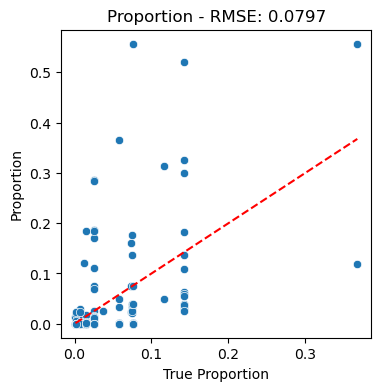

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

In [377]:
min_val = min(performance_eval_lca_95["True Proportion"].min(), performance_eval_lca_95["True Proportion"].min())
max_val = max(performance_eval_lca_95["True Proportion"].max(), performance_eval_lca_95["True Proportion"].max())
x_line = np.linspace(min_val, max_val, 100) 
plt.rcParams["figure.figsize"] = (4,4)
for prop in ["Proportion", "Naive_Proportion", "Penalized_Proportion"]:
    try:
        plt.figure()
        tmp = performance_eval_lca_95[~performance_eval_lca_95["Type"].str.contains("targetref")].reset_index(drop=True)
        sns.scatterplot(data = tmp, x = "True Proportion", y = prop)
        rmse = np.sqrt(np.mean((tmp[prop] - tmp["True Proportion"]) ** 2))
        plt.title(prop + " - RMSE: " + str(round(rmse, 4)))
        plt.plot(x_line, x_line, color='red', linestyle='--', label='1:1 Line')
    except:
        pass

/tmp/ipykernel_30982/333957167.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = performance_eval_lca_95[~performance_eval_lca_95["Type"].str.contains("targetref")][performance_eval_lca_95["Mix"].isin(["MixA", "MixB", "MixC", "MixD"])].reset_index(drop=True)
/tmp/ipykernel_30982/333957167.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = performance_eval_lca_95[~performance_eval_lca_95["Type"].str.contains("targetref")][performance_eval_lca_95["Mix"].isin(["MixA", "MixB", "MixC", "MixD"])].reset_index(drop=True)
/tmp/ipykernel_30982/333957167.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = performance_eval_lca_95[~performance_eval_lca_95["Type"].str.contains("targetref")][performance_eval_lca_95["Mix"].isin(["MixA", "MixB", "MixC", "MixD"])].reset_index(drop=True)


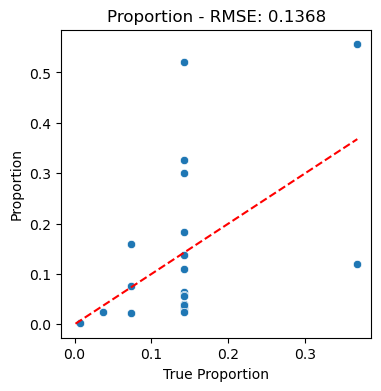

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

In [376]:
min_val = min(performance_eval_lca_95["True Proportion"].min(), performance_eval_lca_95["True Proportion"].min())
max_val = max(performance_eval_lca_95["True Proportion"].max(), performance_eval_lca_95["True Proportion"].max())
x_line = np.linspace(min_val, max_val, 100) 
plt.rcParams["figure.figsize"] = (4,4)
for prop in ["Proportion", "Naive_Proportion", "Penalized_Proportion"]:
    try:
        plt.figure()
        tmp = performance_eval_lca_95[~performance_eval_lca_95["Type"].str.contains("targetref")][performance_eval_lca_95["Mix"].isin(["MixA", "MixB", "MixC", "MixD"])].reset_index(drop=True)
        sns.scatterplot(data = tmp, x = "True Proportion", y = prop)
        rmse = np.sqrt(np.mean((tmp[prop] - tmp["True Proportion"]) ** 2))
        plt.title(prop + " - RMSE: " + str(round(rmse, 4)))
        plt.plot(x_line, x_line, color='red', linestyle='--', label='1:1 Line')
    except:
        pass

/tmp/ipykernel_30982/4111626646.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = performance_eval_lca_95[performance_eval_lca_95["Type"].str.contains("targetref")][performance_eval_lca_95["Mix"].isin(["MixA", "MixB", "MixC", "MixD"])].reset_index(drop=True)
/tmp/ipykernel_30982/4111626646.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = performance_eval_lca_95[performance_eval_lca_95["Type"].str.contains("targetref")][performance_eval_lca_95["Mix"].isin(["MixA", "MixB", "MixC", "MixD"])].reset_index(drop=True)
/tmp/ipykernel_30982/4111626646.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = performance_eval_lca_95[performance_eval_lca_95["Type"].str.contains("targetref")][performance_eval_lca_95["Mix"].isin(["MixA", "MixB", "MixC", "MixD"])].reset_index(drop=True)


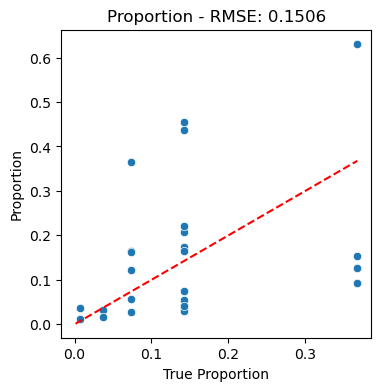

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

In [375]:
min_val = min(performance_eval_lca_95["True Proportion"].min(), performance_eval_lca_95["True Proportion"].min())
max_val = max(performance_eval_lca_95["True Proportion"].max(), performance_eval_lca_95["True Proportion"].max())
x_line = np.linspace(min_val, max_val, 100) 
plt.rcParams["figure.figsize"] = (4,4)
for prop in ["Proportion", "Naive_Proportion", "Penalized_Proportion"]:
    try:
        plt.figure()
        tmp = performance_eval_lca_95[performance_eval_lca_95["Type"].str.contains("targetref")][performance_eval_lca_95["Mix"].isin(["MixA", "MixB", "MixC", "MixD"])].reset_index(drop=True)
        sns.scatterplot(data = tmp, x = "True Proportion", y = prop)
        rmse = np.sqrt(np.mean((tmp[prop] - tmp["True Proportion"]) ** 2))
        plt.title(prop + " - RMSE: " + str(round(rmse, 4)))
        plt.plot(x_line, x_line, color='red', linestyle='--', label='1:1 Line')
    except:
        pass

In [ ]:
min_val = min(performance_eval_lca_95["True Proportion"].min(), performance_eval_lca_95["True Proportion"].min())
max_val = max(performance_eval_lca_95["True Proportion"].max(), performance_eval_lca_95["True Proportion"].max())
x_line = np.linspace(min_val, max_val, 100) 
plt.rcParams["figure.figsize"] = (4,4)
for prop in ["Proportion", "Naive_Proportion", "Penalized_Proportion"]:
    try:
        plt.figure()
        tmp = performance_eval_lca_95[~performance_eval_lca_95["Type"].str.contains("targetref")].reset_index(drop=True)
        sns.scatterplot(data = tmp, x = "True Proportion", y = prop)
        rmse = np.sqrt(np.mean((tmp[prop] - tmp["True Proportion"]) ** 2))
        plt.title(prop + " - RMSE: " + str(round(rmse, 4)))
        plt.plot(x_line, x_line, color='red', linestyle='--', label='1:1 Line')
    except:
        pass

In [360]:
performance_eval = pd.DataFrame()
for abundances in glob.glob("../data/*.abundances"):
    mix = abundances.split("/")[2].split("_")[0]
    type = abundances.split("/")[2]
    tmp = mixes.copy()
    tmp["True Proportion"] = tmp.groupby(["Mix", "TaxName"])["True Proportion"].transform('sum')
    tmp = tmp.drop_duplicates(subset= ['Mix', 'TaxName'], keep = "first").reset_index(drop=True)
    assignments = pd.read_csv(abundances)
    assignments["Mix"] = mix
    assignments["Type"] = type
    assignments["Proportion"] = assignments["Assigned_Bases"] / assignments["Assigned_Bases"][assignments["Rank"] == "species"].sum()
    assignments = assignments.merge(tmp[["Mix", "TaxName", "True Proportion"]], how = "left", on = ["Mix", "TaxName"])
    performance_eval = pd.concat([performance_eval, assignments]).reset_index(drop=True)

In [ ]:
["MixA", "MixB", "MixC", "MixD"]

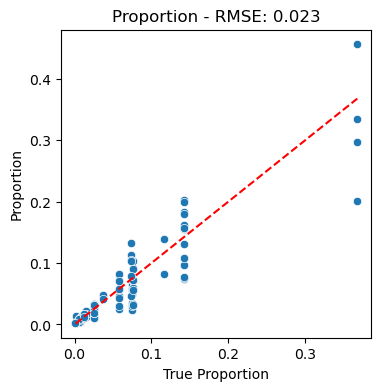

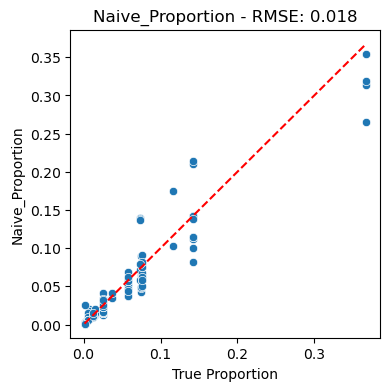

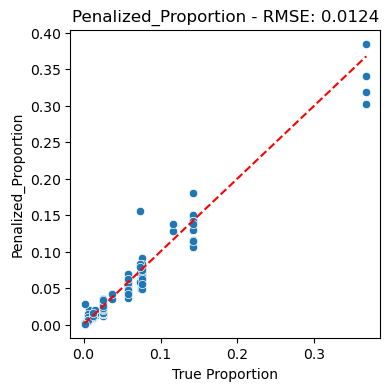

In [365]:
min_val = min(performance_eval["True Proportion"].min(), performance_eval["True Proportion"].min())
max_val = max(performance_eval["True Proportion"].max(), performance_eval["True Proportion"].max())
x_line = np.linspace(min_val, max_val, 100) 
plt.rcParams["figure.figsize"] = (4,4)
for prop in ["Proportion", "Naive_Proportion", "Penalized_Proportion"]:
    plt.figure()
    tmp = performance_eval[~performance_eval["Type"].str.contains("targetref")].reset_index(drop=True)
    sns.scatterplot(data = tmp, x = "True Proportion", y = prop)
    rmse = np.sqrt(np.mean((tmp[prop] - tmp["True Proportion"]) ** 2))
    plt.title(prop + " - RMSE: " + str(round(rmse, 4)))
    plt.plot(x_line, x_line, color='red', linestyle='--', label='1:1 Line')

/tmp/ipykernel_30982/727683237.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = performance_eval[~performance_eval["Type"].str.contains("targetref")][performance_eval["Mix"].isin(["MixA", "MixB", "MixC", "MixD"])].reset_index(drop=True)
/tmp/ipykernel_30982/727683237.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = performance_eval[~performance_eval["Type"].str.contains("targetref")][performance_eval["Mix"].isin(["MixA", "MixB", "MixC", "MixD"])].reset_index(drop=True)
/tmp/ipykernel_30982/727683237.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = performance_eval[~performance_eval["Type"].str.contains("targetref")][performance_eval["Mix"].isin(["MixA", "MixB", "MixC", "MixD"])].reset_index(drop=True)


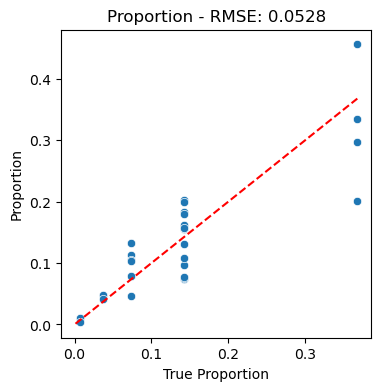

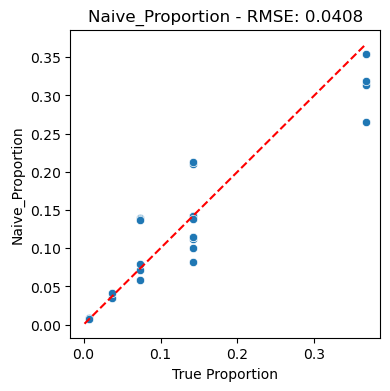

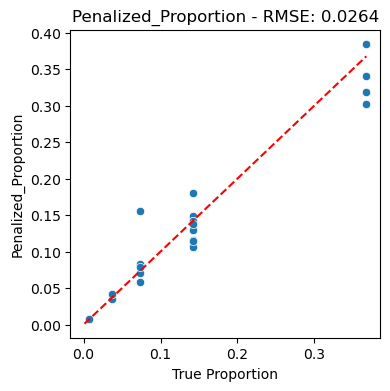

In [364]:
min_val = min(performance_eval["True Proportion"].min(), performance_eval["True Proportion"].min())
max_val = max(performance_eval["True Proportion"].max(), performance_eval["True Proportion"].max())
x_line = np.linspace(min_val, max_val, 100) 
plt.rcParams["figure.figsize"] = (4,4)
for prop in ["Proportion", "Naive_Proportion", "Penalized_Proportion"]:
    plt.figure()
    tmp = performance_eval[~performance_eval["Type"].str.contains("targetref")][performance_eval["Mix"].isin(["MixA", "MixB", "MixC", "MixD"])].reset_index(drop=True)
    sns.scatterplot(data = tmp, x = "True Proportion", y = prop)
    rmse = np.sqrt(np.mean((tmp[prop] - tmp["True Proportion"]) ** 2))
    plt.title(prop + " - RMSE: " + str(round(rmse, 4)))
    plt.plot(x_line, x_line, color='red', linestyle='--', label='1:1 Line')

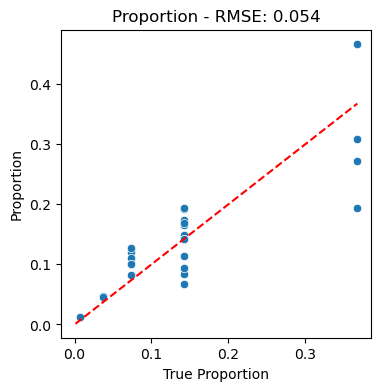

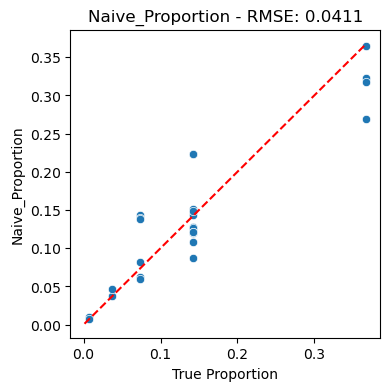

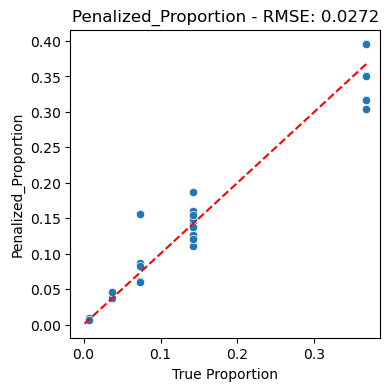

In [362]:
min_val = min(performance_eval["True Proportion"].min(), performance_eval["True Proportion"].min())
max_val = max(performance_eval["True Proportion"].max(), performance_eval["True Proportion"].max())
x_line = np.linspace(min_val, max_val, 100) 
plt.rcParams["figure.figsize"] = (4,4)
for prop in ["Proportion", "Naive_Proportion", "Penalized_Proportion"]:
    plt.figure()
    tmp = performance_eval[performance_eval["Type"].str.contains("targetref")].reset_index(drop=True)
    sns.scatterplot(data = tmp, x = "True Proportion", y = prop)
    rmse = np.sqrt(np.mean((tmp[prop] - tmp["True Proportion"]) ** 2))
    plt.title(prop + " - RMSE: " + str(round(rmse, 4)))
    plt.plot(x_line, x_line, color='red', linestyle='--', label='1:1 Line')

In [35]:
import pandas as pd
import numpy as np

# Example distance matrix with duplicated taxIDs in both index and columns
distance_matrix = pd.DataFrame([
    [0.00, 0.04, 0.07, 0.07, 0.07],
    [0.04, 0.00, 0.08, 0.08, 0.08],
    [0.07, 0.08, 0.00, 0.00, 0.01],
    [0.07, 0.08, 0.00, 0.00, 0.05],
    [0.07, 0.08, 0.01, 0.05, 0.00],
], index=[217026, 8236, 13676, 13676, 338315], columns=[217026, 8236, 13676, 13676, 338315])

# Step 1: Group rows and columns by taxID
# Average all rows with the same taxID
grouped_rows = distance_matrix.groupby(distance_matrix.index).mean()
grouped_full = grouped_rows.T.groupby(distance_matrix.columns, axis=0).mean().T

# Step 2: Ensure symmetry (optional but good practice for distances)
# Average the matrix with its transpose
symmetric_matrix = (grouped_full + grouped_full.T) / 2

# Step 3: Fill diagonal with 0 (optional)
np.fill_diagonal(symmetric_matrix.values, 0)

# Final result
print(symmetric_matrix)


        8236    13676   217026  338315
8236      0.00    0.08    0.04    0.08
13676     0.08    0.00    0.07    0.03
217026    0.04    0.07    0.00    0.07
338315    0.08    0.03    0.07    0.00


/tmp/ipykernel_30982/546818455.py:18: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  grouped_full = grouped_rows.T.groupby(distance_matrix.columns, axis=0).mean().T


In [112]:
import pandas as pd

# Example distance matrix (species names as rows and columns)
distance_matrix = pd.DataFrame({
    217026: {217026: 0, 8236: 0.04, 13676: 0.07, 13676: 0.07, 338315: 0.07},
    8236: {217026: 0.04, 8236: 0, 13676: 0.08, 13676: 0.08, 338315: 0.08},
    13676: {217026: 0.07, 8236: 0.08, 13676: 0, 13676: 0.05, 338315: 0.01},
    13676: {217026: 0.07, 8236: 0.08, 13676: 0.05, 13676: 0, 338315: 0.05},
    338315: {217026: 0.07, 8236: 0.08, 13676: 0.01, 13676: 0.05, 338315: 0},
})

# observed_read_counts uses taxids
read_counts = {
    8224: 300, # Scombridae
    217026: 300, # Auxis rochei
    8236: 300, # Thunnus thynnus
    13675: 150,  # Scomber
    13676: 50,  # S_japonicus
    13677: 50,   # S_scomber
    338315: 50  # S_colias
}

naive_final, mash_final= propagate_counts(
    taxid_list=list(read_counts.keys()),
    nodes_path="../examples/nodes.dmp.gz",
    names_path="../examples/names.dmp.gz",
    observed_read_counts=read_counts,
    mash_penalty=True,
    distance_matrix=distance_matrix
)


In [134]:
tests = pd.read_csv("../examples/MixA_bowtie_global.abundances")
tests["Proportion"] = tests["Assigned_Bases"] / tests["Assigned_Bases"].sum()
mixes = pd.read_csv("../data/mixes_for_ngsLCA_tests.csv")
mixes["TaxName"] = mixes["Constituent"].str.replace("_", " ")
mixes["True Proportion"] = mixes["Proportion"]
tests = tests.merge(mixes[["TaxName", "True Proportion"]][mixes["Mix"] == "MixE"], how = "left", on = "TaxName")

In [123]:
import numpy as np

true = np.array(tests["True Proportion"].tolist())      # your true values, e.g. [2.5, 2.5, 2.5]
predicted = np.array(tests["Proportion"].tolist())  # your predicted values

rmse = np.sqrt(np.mean((predicted - true) ** 2))
print(f"RMSE: {rmse}")


RMSE: 0.006270400844234428


In [125]:
true = np.array(tests["True Proportion"].tolist())      # your true values, e.g. [2.5, 2.5, 2.5]
predicted = np.array(tests["Naive_Proportion"].tolist())  # your predicted values

rmse = np.sqrt(np.mean((predicted - true) ** 2))
print(f"RMSE: {rmse}")


RMSE: 0.004643126912071987


In [124]:
true = np.array(tests["True Proportion"].tolist())      # your true values, e.g. [2.5, 2.5, 2.5]
predicted = np.array(tests["Penalized_Proportion"].tolist())  # your predicted values

rmse = np.sqrt(np.mean((predicted - true) ** 2))
print(f"RMSE: {rmse}")


RMSE: 0.004113186855134322


In [126]:
np.mean(np.abs(np.array(tests["Penalized_Proportion"].tolist())-0.025))

0.003053718043585278

In [127]:
np.mean(np.abs(np.array(tests["Proportion"].tolist())-0.025))

0.005292258743986285

In [128]:
np.mean(np.abs(np.array(tests["Naive_Proportion"].tolist())-0.025))

0.0032189025541945657

In [129]:
from scipy.stats import chisquare
chisquare(f_obs=np.array(tests["Penalized_Proportion"].tolist()), f_exp=np.array(tests["True Proportion"].tolist()))

Power_divergenceResult(statistic=0.02706928976839964, pvalue=1.0)

In [130]:
chisquare(f_obs=np.array(tests["Proportion"].tolist()), f_exp=np.array(tests["True Proportion"].tolist()))

Power_divergenceResult(statistic=0.0629086827958013, pvalue=1.0)

In [131]:
chisquare(f_obs=np.array(tests["Naive_Proportion"].tolist()), f_exp=np.array(tests["True Proportion"].tolist()))

Power_divergenceResult(statistic=0.034493804034571446, pvalue=1.0)

In [12]:
import pandas as pd
from io import StringIO

# Load Mash distances
df = pd.read_csv("alldists.tsv", sep="\t", header=None,
                 names=["species1", "species2", "distance", "shared", "pvalue"])

# Get unique species names
species = sorted(set(df["species1"]).union(set(df["species2"])))
species_clean = [s.replace(".fa.gz", "").replace("./reference_genomes/", "") for s in species]

# Initialize distance matrix
dist_matrix = pd.DataFrame(0.0, index=species_clean, columns=species_clean)

# Fill the matrix with Mash distances
for _, row in df.iterrows():
    s1 = row["species1"].replace(".fa.gz", "").replace("./reference_genomes/", "")
    s2 = row["species2"].replace(".fa.gz", "").replace("./reference_genomes/", "")
    dist_matrix.loc[s1, s2] = row["distance"]
    dist_matrix.loc[s2, s1] = row["distance"]

In [13]:
dist_matrix_subset = dist_matrix.reset_index(drop=False)

In [14]:
perc_correct = []
closest = []
taxa = []
for sp in ["Scomber_japonicus"]:
    mismap = (test[(test["TaxName"] == sp.replace("_", " ")) 
              & (~test["ReadName"].str.contains("|".join(keys["Run"][keys["Mix"] == "MixE"][keys["Constituent"] == sp].tolist())))]).copy()
    mismap["sample"] = mismap["ReadName"].str.split(".", expand = True)[0]
    mismap["sample"] = mismap["sample"].str.rsplit("_", expand = True, n = 1)[0]
    mismap = mismap.merge(samplemap[["sample", "Constituent"]], how = "left", on = "sample").reset_index(drop=True)
    wrongtaxa = mismap["Constituent"].unique()
    correctlymapped = (sum(test["TotalBases"][test["TaxName"] == sp.replace("_", " ")]
                [test["ReadName"].str.contains("|".join(keys["Run"][keys["Mix"] == "MixE"][keys["Constituent"] == sp].tolist()))]))
    totaltospecies = (sum(test["TotalBases"][test["TaxName"] == sp.replace("_", " ")]))
    closestwrong = dist_matrix_subset[sp][dist_matrix_subset[sp] != 0][dist_matrix_subset["index"].isin(wrongtaxa)].sort_values().reset_index(drop=True)[0]
    perc_correct = perc_correct + [correctlymapped / totaltospecies]
    closest = closest + [closestwrong]
    taxa = taxa + [sp]
perc_correct = np.array(perc_correct)
closest = np.array(closest)

In [20]:
mismap["TotalBases"][mismap["Constituent"] == "Scomber_colias"].sum() / totaltospecies

0.21057996270606047

In [15]:
correctlymapped

4097153

In [73]:
perc_correct = []
closest = []
taxa = []
for sp in set(keys["Constituent"][keys["Mix"] == "MixE"].tolist()):
    mismap = (test[(test["TaxName"] == sp.replace("_", " ")) 
              & (~test["ReadName"].str.contains("|".join(keys["Run"][keys["Mix"] == "MixE"][keys["Constituent"] == sp].tolist())))]).copy()
    mismap["sample"] = mismap["ReadName"].str.split(".", expand = True)[0]
    mismap["sample"] = mismap["sample"].str.rsplit("_", expand = True, n = 1)[0]
    mismap = mismap.merge(samplemap[["sample", "Constituent"]], how = "left", on = "sample").reset_index(drop=True)
    wrongtaxa = mismap["Constituent"].unique()
    correctlymapped = (sum(test["TotalBases"][test["TaxName"] == sp.replace("_", " ")]
                [test["ReadName"].str.contains("|".join(keys["Run"][keys["Mix"] == "MixE"][keys["Constituent"] == sp].tolist()))]))
    totaltospecies = (sum(test["TotalBases"][test["TaxName"] == sp.replace("_", " ")]))
    closestwrong = dist_matrix_subset[sp][dist_matrix_subset[sp] != 0][dist_matrix_subset["index"].isin(wrongtaxa)].sort_values().reset_index(drop=True)[0]
    perc_correct = perc_correct + [correctlymapped / totaltospecies]
    closest = closest + [closestwrong]
    taxa = taxa + [sp]
perc_correct = np.array(perc_correct)
closest = np.array(closest)

In [134]:
perc_correct = []
closest = []
taxa = []
for sp in ["Clupea_harengus"]:
    mismap = (test[(test["TaxName"] == sp.replace("_", " ")) 
              & (~test["ReadName"].str.contains("|".join(keys["Run"][keys["Mix"] == "MixE"][keys["Constituent"] == sp].tolist())))]).copy()
    mismap["sample"] = mismap["ReadName"].str.split(".", expand = True)[0]
    mismap["sample"] = mismap["sample"].str.rsplit("_", expand = True, n = 1)[0]
    mismap = mismap.merge(samplemap[["sample", "Constituent"]], how = "left", on = "sample").reset_index(drop=True)
    wrongtaxa = mismap["Constituent"].unique()
    correctlymapped = (sum(test["TotalBases"][test["TaxName"] == sp.replace("_", " ")]
                [test["ReadName"].str.contains("|".join(keys["Run"][keys["Mix"] == "MixE"][keys["Constituent"] == sp].tolist()))]))
    totaltospecies = (sum(test["TotalBases"][test["TaxName"] == sp.replace("_", " ")]))
    closestwrong = dist_matrix_subset[sp][dist_matrix_subset[sp] != 0][dist_matrix_subset["index"].isin(wrongtaxa)].sort_values().reset_index(drop=True)[0]
    perc_correct = perc_correct + [correctlymapped / totaltospecies]
    closest = closest + [closestwrong]
    taxa = taxa + [sp]
perc_correct = np.array(perc_correct)
closest = np.array(closest)

/tmp/ipykernel_124/3076865690.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test["R2_AvgQual"][test["TaxName"] == sp.replace("_", " ")]


<Axes: xlabel='R2_AvgQual', ylabel='Density'>

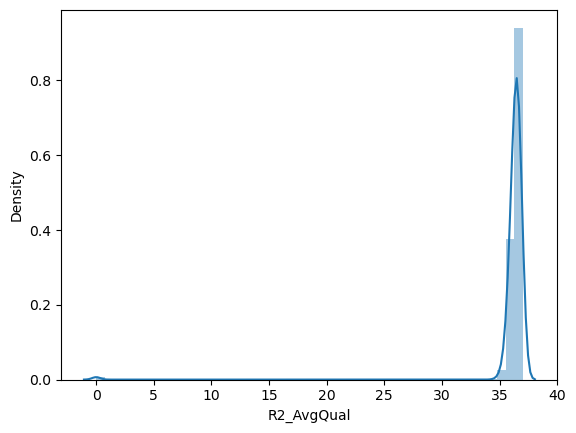

In [135]:
sns.distplot(test["R2_AvgQual"][test["TaxName"] == sp.replace("_", " ")]
                [test["ReadName"].str.contains("|".join(keys["Run"][keys["Mix"] == "MixE"][keys["Constituent"] == sp].tolist()))])

In [137]:
mismap

ReadName  TaxID  \
0    A_sapidissima_E00526:585:HJLFCCCX2:6:1114:1631...   7950   
1                      B_patronus_SRR21844101.123497.2   7950   
2                      B_patronus_SRR21844101.182355.2   7950   
3                      B_patronus_SRR21844101.190457.1   7950   
4                      B_patronus_SRR21844101.351274.1   7950   
..                                                 ...    ...   
541     Z_faber_E00526:585:HJLFCCCX2:6:1221:15727:3313   7950   
542    Z_faber_E00526:585:HJLFCCCX2:6:2102:12976:11171   7950   
543    Z_faber_E00526:585:HJLFCCCX2:6:2108:12510:20243   7950   
544     Z_faber_E00526:585:HJLFCCCX2:6:2121:6431:32812   7950   
545    Z_faber_E00526:585:HJLFCCCX2:6:2121:13880:12560   7950   

             TaxName     Rank  TotalBases  BestIdentity ReadPairConcordance  \
0    Clupea harengus  species         125        0.2080            unpaired   
1    Clupea harengus  species         148        0.5203            unpaired   
2    Clupea harengus  species          39        1.0000            unpaired   
3    Clupea harengus  species         149        0.6510            unpaired   
4    Clupea harengus  species         149        0.5973            unpaired   
..               ...      ...         ...           ...                 ...   
541  Clupea harengus  species         148        0.2365            unpaired   
542  Clupea harengus  species         125        0.2240            unpaired   
543  Clupea harengus  species         123        0.2764            unpaired   
544  Clupea harengus  species         149        0.3356            unpaired   
545  Clupea harengus  species         149        0.3758            unpaired   

     R1_Length  R1_Matches  R1_Insertions  ...  R1_AvgQual  R2_Length  \
0          125           0              0  ...       39.32          0   
1            0           0              0  ...        0.00          0   
2            0           0              0  ...        0.00          0   
3            0           0              0  ...        0.00          0   
4            0           0              0  ...        0.00          0   
..         ...         ...            ...  ...         ...        ...   
541        148           0              0  ...       40.15          0   
542        125           0              0  ...       40.36          0   
543        123           0              0  ...       40.03          0   
544        149           0              0  ...       40.14          0   
545        149           3              0  ...       40.40          0   

     R2_Matches  R2_Insertions  R2_Deletions  R2_Softclips  R2_Hardclips  \
0             0              0             0             0             0   
1             0              0             0             0             0   
2             0              0             0             0             0   
3             0              0             0             0             0   
4             0              0             0             0             0   
..          ...            ...           ...           ...           ...   
541           0              0             0             0             0   
542           0              0             0             0             0   
543           0              0             0             0             0   
544           0              0             0             0             0   
545           0              0             0             0             0   

     R2_AvgQual         sample          Constituent  
0           0.0  A_sapidissima    Alosa_sapidissima  
1           0.0     B_patronus  Brevoortia_patronus  
2           0.0     B_patronus  Brevoortia_patronus  
3           0.0     B_patronus  Brevoortia_patronus  
4           0.0     B_patronus  Brevoortia_patronus  
..          ...            ...                  ...  
541         0.0        Z_faber           Zeus_faber  
542         0.0        Z_faber           Zeus_faber  
543         0.0        Z_faber          

/tmp/ipykernel_124/1944317509.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mismap["R1_AvgQual"])


<Axes: xlabel='R1_AvgQual', ylabel='Density'>

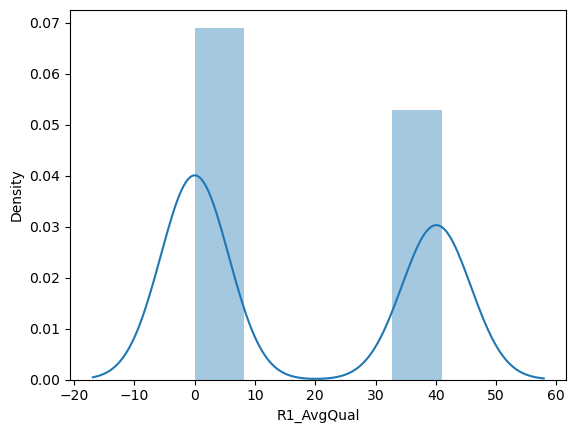

In [136]:
sns.distplot(mismap["R1_AvgQual"])

In [99]:
tests = pd.DataFrame(data = [closest, perc_correct, taxa]).T

Text(0.5, 0, 'Mash Distance of Most Closely Related Mismap')

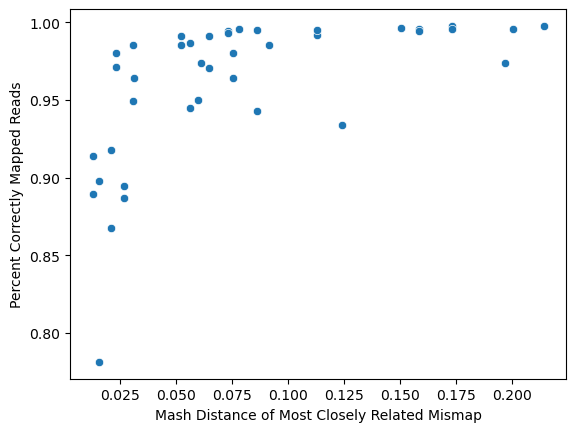

In [93]:
sns.scatterplot(x = closest, y = perc_correct)
plt.ylabel("Percent Correctly Mapped Reads")
plt.xlabel("Mash Distance of Most Closely Related Mismap")


‚úÖ Best model: Weibull CDF
R¬≤ = 0.57687
Parameters: [0.99097066 0.00240406 0.43930711]


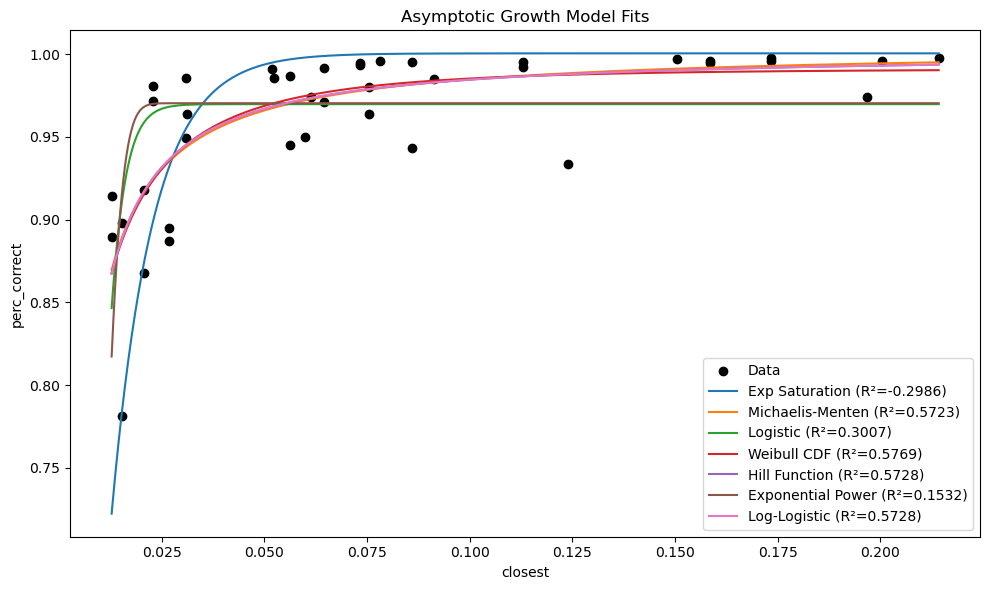

In [92]:
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


# 1. Define all asymptotic models
# Models
def exp_saturation(x, a, b):
    return a * (1 - np.exp(-b * x))

def michaelis_menten(x, a, b):
    return (a * x) / (b + x)

def logistic(x, L, k, x0):
    base = 1 / (1 + np.exp(-k * (x - x0)))
    offset = 1 / (1 + np.exp(k * x0))  # value at x=0
    return L * (base - offset)

def weibull_cdf(x, a, b, c):
    return a * (1 - np.exp(- (x / b) ** c))

def hill_function(x, a, k, n):
    return a * (x**n) / (k**n + x**n)

def exp_power(x, a, b, c):
    return a * (1 - np.exp(-(b * x)**c))

def log_logistic(x, a, b, c):
    return a / (1 + (x / b) ** -c)


# Reasonable initial guesses and bounds
max_y = np.array(perc_correct).max()
x_median = np.median(np.array(closest))
models = {
    'Exp Saturation': (exp_saturation, [max_y, 10], (0, [1.1 * max_y, 100])),
    'Michaelis-Menten': (michaelis_menten, [max_y, x_median], (0, [1.1 * max_y, 1.0])),
    'Logistic': (logistic, [max_y, 100, x_median], (0, [1.1 * max_y, 1000, 1.0])),
    'Weibull CDF': (weibull_cdf, [max_y, x_median, 2.0], (0, [1.1 * max_y, 1.0, 10])),
    'Hill Function': (hill_function, [max_y, x_median, 2.0], (0, [1.1 * max_y, 1.0, 10])),
    'Exponential Power': (exp_power, [max_y, 10, 1.0], (0, [1.1 * max_y, 100, 10])),
    'Log-Logistic': (log_logistic, [max_y, x_median, 2.0], (0, [1.1 * max_y, 1.0, 10]))
}


# Fit models
fit_results = {}

for name, (func, p0, bounds) in models.items():
    try:
        popt, _ = curve_fit(func, closest, perc_correct, p0=p0, bounds=bounds, maxfev=10000)
        y_pred = func(closest, *popt)
        r2 = r2_score(perc_correct, y_pred)
        fit_results[name] = {'params': popt, 'r2': r2, 'func': func}
    except Exception as e:
        print(f"‚ùå {name} failed to fit: {e}")

# Best model
best_name, best_info = max(fit_results.items(), key=lambda kv: kv[1]['r2'])
print(f"\n‚úÖ Best model: {best_name}")
print(f"R¬≤ = {best_info['r2']:.5f}")
print("Parameters:", best_info['params'])

# Plot
x_fit = np.linspace(min(closest), max(closest), 500)
plt.figure(figsize=(10, 6))
plt.scatter(closest, perc_correct, label='Data', color='black')

for name, info in fit_results.items():
    y_fit = info['func'](x_fit, *info['params'])
    plt.plot(x_fit, y_fit, label=f"{name} (R¬≤={info['r2']:.4f})")

plt.xlabel("closest")
plt.ylabel("perc_correct")
plt.legend()
plt.title("Asymptotic Growth Model Fits")
plt.tight_layout()
plt.show()